The project is broken down into multiple steps:

Load and preprocess the image dataset

Train the image classifier on your dataset

Use the trained classifier to predict image content

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# re-size all the input images 
IMAGE_SIZE = [224,224]

In [3]:
train_path="C:/Users/user/New folder7/7/train"
test_path="C:/Users/user/New folder7/7/test"
val_path="C:/Users/user/New folder7/7/valid"

In [4]:
x_train=[]

for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

In [5]:
x_test=[]

for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

In [6]:
x_val=[]

for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [7]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [8]:
train_x.shape,test_x.shape,val_x.shape

((100, 224, 224, 3), (41, 224, 224, 3), (50, 224, 224, 3))

In [9]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [10]:

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 100 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


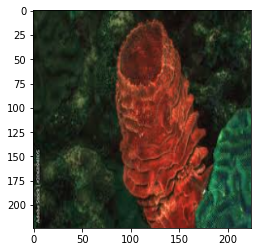

In [11]:
i=np.random.randint(1,len(train_x))
plt.imshow(train_x[i])

In [12]:
training_set.class_indices

{'tube sponge': 0, 'vase sponge': 1}

In [13]:
train_y=training_set.classes

In [14]:
test_y=test_set.classes

In [15]:
val_y=val_set.classes

In [16]:
train_y.shape,test_y.shape,val_y.shape

((100,), (41,), (50,))

# Building and training the classifier

Load a pre-trained network (the VGG networks)

Define a new, untrained feed-forward network as a classifier, using ReLU activations

Train the classifier layers using backpropagation using the pre-trained network to get the features

Track the loss and accuracy on the validation set to determine the best hyperparameters

In [17]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [19]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

In [20]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

#Early stopping to avoid overfitting of model

In [23]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=5,
  callbacks=[early_stop],
  batch_size=2,shuffle=True)

Epoch 1/5
50/50 [==============================] - 91s 2s/step - loss: 0.8199 - accuracy: 0.7100 - val_loss: 0.0921 - val_accuracy: 0.9800
Epoch 2/5
50/50 [==============================] - 82s 2s/step - loss: 0.1381 - accuracy: 0.9500 - val_loss: 0.1333 - val_accuracy: 0.9200
Epoch 3/5
50/50 [==============================] - 81s 2s/step - loss: 0.0129 - accuracy: 0.9900 - val_loss: 0.1301 - val_accuracy: 0.9400
Epoch 4/5
50/50 [==============================] - 82s 2s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 1.0000
Epoch 5/5
50/50 [==============================] - 83s 2s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0834 - val_accuracy: 0.9400


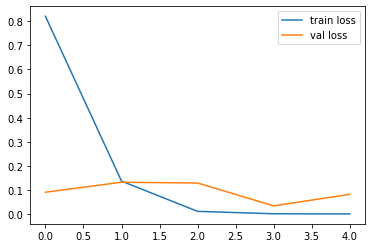

In [24]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-rps-1.png')
plt.show()

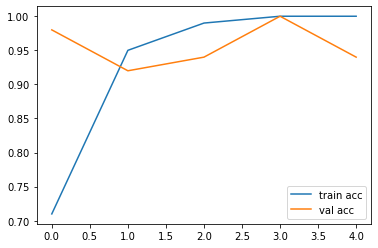

In [25]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-rps-1.png')
plt.show()

In [26]:
model.evaluate(test_x,test_y,batch_size=2)

21/21 [==============================] - 23s 1s/step - loss: 0.1225 - accuracy: 0.9512


[0.12251870334148407, 0.9512194991111755]

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [28]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [29]:
accuracy_score(y_pred,test_y)

0.9512195121951219

In [30]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.90      1.00      0.95        18

    accuracy                           0.95        41
   macro avg       0.95      0.96      0.95        41
weighted avg       0.96      0.95      0.95        41



In [31]:
confusion_matrix(y_pred,test_y)

array([[21,  2],
       [ 0, 18]], dtype=int64)

In [32]:
model.save("vgg-rps-final.h5")

In [23]:
from keras.models import load_model
model = load_model('vgg-rps-final.h5')

In [24]:
classes ={0:'tube sea sponge', 1:'vase sea sponge'}

# Testing the model 

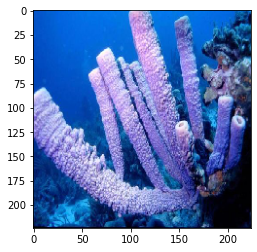

tube sea sponge


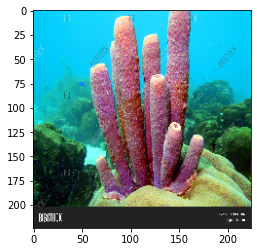

tube sea sponge


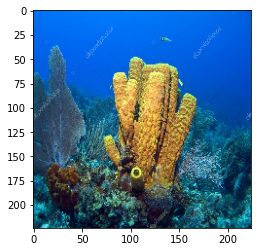

tube sea sponge


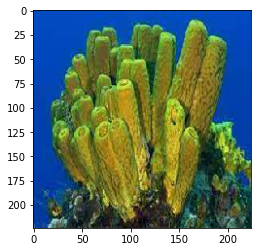

tube sea sponge


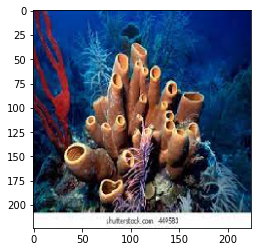

tube sea sponge


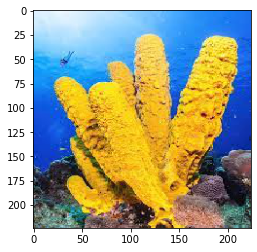

tube sea sponge


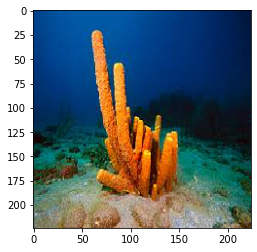

tube sea sponge


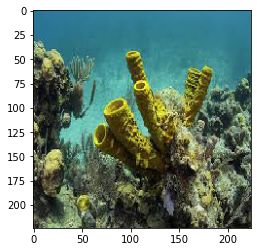

tube sea sponge


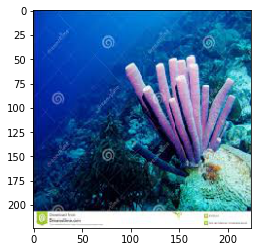

tube sea sponge


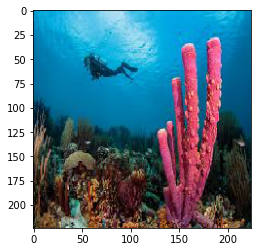

tube sea sponge


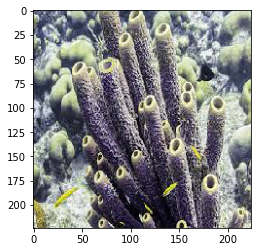

tube sea sponge


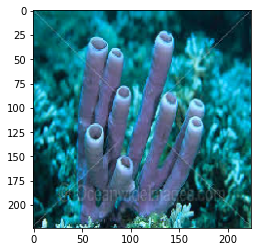

tube sea sponge


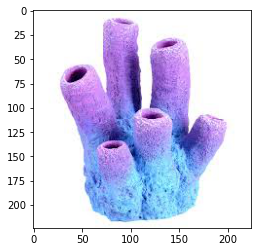

tube sea sponge


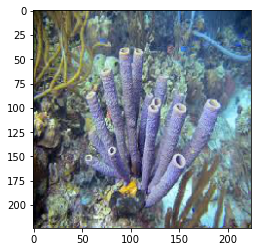

tube sea sponge


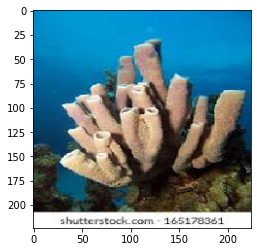

tube sea sponge


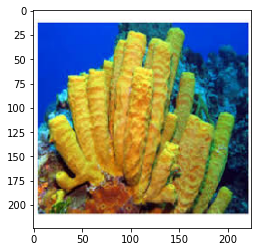

tube sea sponge


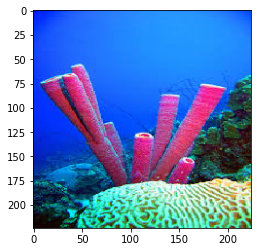

tube sea sponge


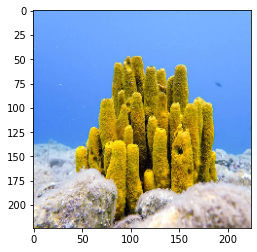

tube sea sponge


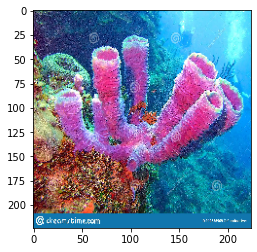

tube sea sponge


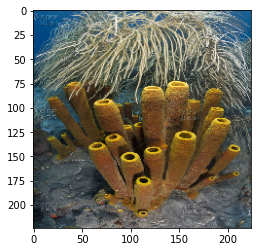

tube sea sponge


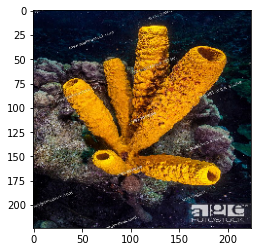

tube sea sponge


In [25]:
# Prediction on test images of Tube sea sponge

path="C:/Users/user/New folder7/7/test/tube sponge"
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("tube sea sponge")
    elif pred[0][1]>0.5:
        print("vase sea sponge")
    else:
        print("Unknown")

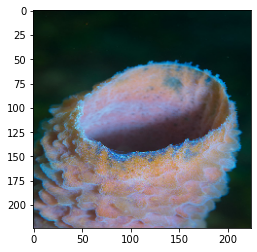

vase sea sponge


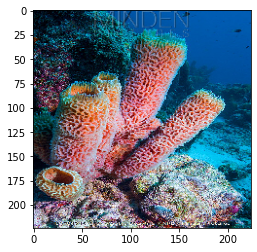

tube sea sponge


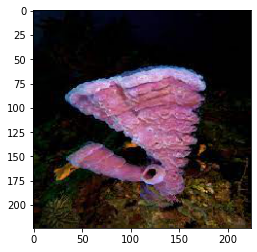

vase sea sponge


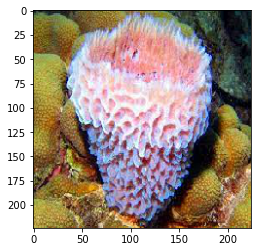

vase sea sponge


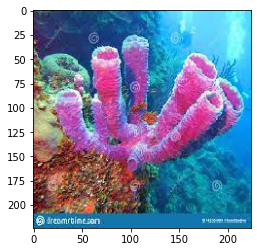

tube sea sponge


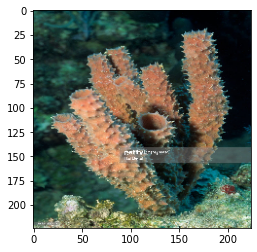

tube sea sponge


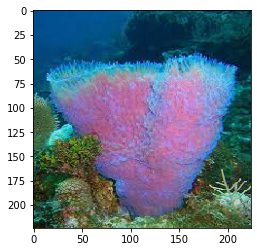

tube sea sponge


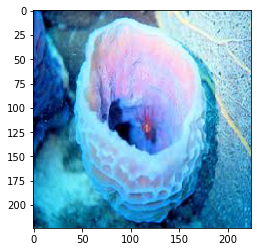

vase sea sponge


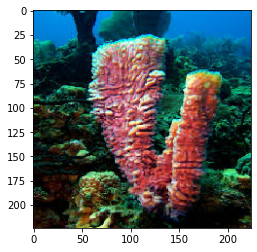

tube sea sponge


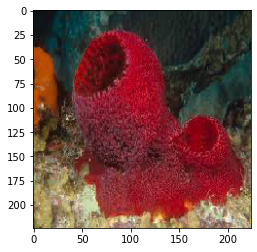

vase sea sponge


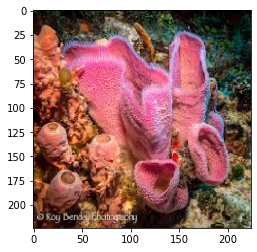

vase sea sponge


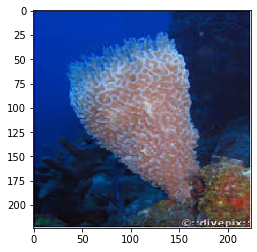

vase sea sponge


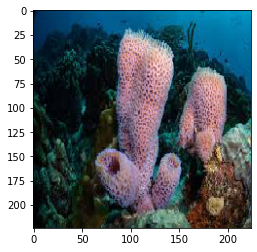

vase sea sponge


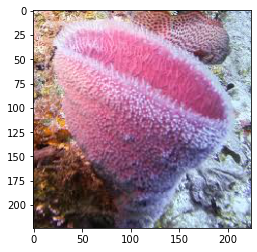

vase sea sponge


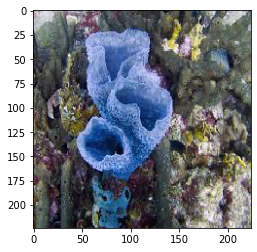

tube sea sponge


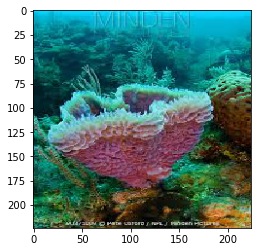

tube sea sponge


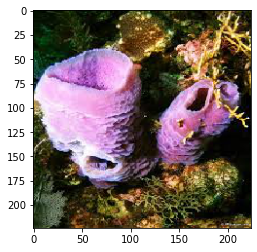

vase sea sponge


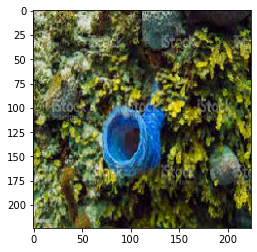

tube sea sponge


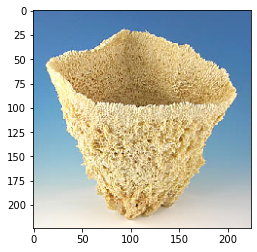

vase sea sponge


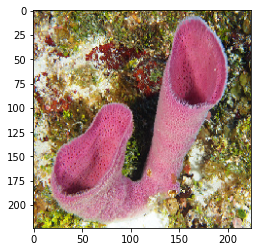

vase sea sponge


In [26]:
# Prediction on test images of Vase sea sponge

path="C:/Users/user/New folder7/7/test/vase sponge"
for img in os.listdir(path):
    img=image.load_img(path+"/"+img,target_size=(224,224))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images,batch_size=1) 
    if pred[0][0]>0.5:
        print("tube sea sponge")
    elif pred[0][1]>0.5:
        print("vase sea sponge")
    else:
        print("Unknown")

# Conclusion

The model predicted tube sea sponge accurately and also predicted vase sea sponge 
but the model predicting vase sea sponge based on top view of image

further we have train the model with more images to get better results 